# **Group Work Project # 2**

## **Data Collection & Processing**

For our handbook we are going to use 5 years of daily return data from META

> We are using Yahoo Finance API to to collect our data.
> After that we are calculating the daily returns and droping missing data and properly  formatting it.


In [1]:
!pip install yfinance


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (12, 9)

In [3]:
def assets(tickers):
  for i in tickers:
    asset_df = yf.download(tickers, start='2019-03-21', end='2024-03-21', progress=False)
    asset_df = asset_df.loc[:, ["Adj Close"]]
    asset_df['META'] = asset_df['Adj Close'].pct_change().dropna()
  return asset_df

In [4]:
tickers = ['META']

In [5]:
main_df = assets(tickers)
main_df

Adj Close      META
Date                            
2019-03-21  165.903976       NaN
2019-03-22  164.165817 -0.010477
2019-03-25  166.113739  0.011866
2019-03-26  167.502274  0.008359
2019-03-27  165.694199 -0.010794
...                ...       ...
2024-03-14  491.829987 -0.007547
2024-03-15  484.100006 -0.015717
2024-03-18  496.980011  0.026606
2024-03-19  496.239990 -0.001489
2024-03-20  505.519989  0.018701

[1259 rows x 2 columns]

In [6]:
main_df = main_df.drop(main_df.index[0])
main_df

Adj Close      META
Date                            
2019-03-22  164.165817 -0.010477
2019-03-25  166.113739  0.011866
2019-03-26  167.502274  0.008359
2019-03-27  165.694199 -0.010794
2019-03-28  165.374542 -0.001929
...                ...       ...
2024-03-14  491.829987 -0.007547
2024-03-15  484.100006 -0.015717
2024-03-18  496.980011  0.026606
2024-03-19  496.239990 -0.001489
2024-03-20  505.519989  0.018701

[1258 rows x 2 columns]

### The Four challenges that we have picked are :

*   **Modeling randomness** [Team Member 1]
*   **Autocorrelation** [Team Member 2]
*   **Heteroskedasticity** [Team Member 3]
*   **Non-stationarity** [Team Member 1,2,3]

Note: All worked on Directions together

> **Throughout this handbook we are going to address:-**

1. Definition: Technical definition using formulas or equations
2. Description: Written explanation (1–2 sentences)
3. Demonstration: Numerical example using real-world data (or simulated data if
not found)
4. Diagram: Visual example using real-world data (using same data as above)
5. Diagnosis: How to recognize or test that the problem exists
6. Damage: Clear statement of the damaged caused by the problem
7. Directions: Suggested models that can address this


## **Modeling randomness**

### Definition


---
We will be understanding about the challanges of modeling of randomness but let's first understand what is randomness actually.

In an time series data the unpredictable variation in the data points over time is called randomness. it is often represnted as stochastic processes or random variables. we can mathematically define it using probability distribution like normal distrbution.

Now let's understand it using mathamatical approach :

Let Randomness in time series $X_t$ represented by random varaible $X$ with a normal distibution N(μ,σ^2)$, where:

*   $μ$ is the mean of noraml distribution.
*   $σ^2$ is the varaince of the distribution.

So Now the PDF of normal density function is:

> $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

where,

* $x$ is the random varibale.
* $e$ is the base of natural log.
* $π$ is the mathamaticla constant.

this PDF formula states tha probabiltiy of observing a specific value $x$ in the distribution, have the higher probability to be around the mean $μ$ and decreasing probabilties as $x$ shift away from mean according to the varaince $σ^2$.










### Description


---

As famously said by "Nassim Nicholas Taleb" in his book (Fooled by Randomness: The Hidden Role of Chance in Life and in the Markets)(Taleb):



> “No matter how sophisticated our choices, how good we are at dominating the odds, randomness will have the last word.”

We also face similar situation while dealing with financial time series data, Uncertainity is one of the most Prevailing factor while dealing with financial time series data which is random. And this make it one the most importnat challanges in Quantative finance as it's challenging to predict future values. That's why we need to consider randomness effectively which accounts for this uncertainty in forecasting processes.



### Demonstration

---
Now we will understand randomness in out financial time series data. to demonstrate this we are going to plot time series plot of stock price as well as stock return to understand the variation in the time series data.
we are also going to plot histogram and calculate the descriptive statistics such as mean,median, std dev. etc to undestand the variation and potential randomness.

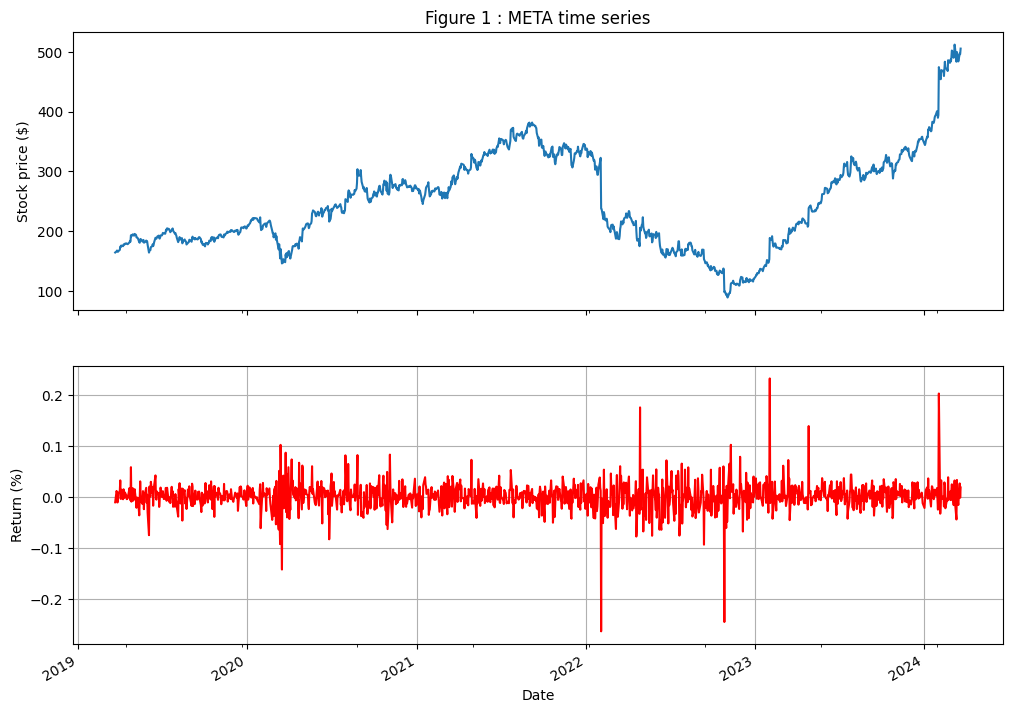

In [7]:
fig, ax = plt.subplots(2, 1, sharex=True)
main_df["Adj Close"].plot(ax=ax[0])
ax[0].set(title="Figure 1 : META time series",
 ylabel="Stock price ($)")
plt.grid(True)

main_df["META"].plot(ax=ax[1], color='red')
ax[1].set(ylabel="Return (%)")
plt.grid(True)
plt.show()

In [8]:
pdf = np.linspace(min(main_df["META"]),
                  max(main_df["META"]),
                  num=1000)

mu = main_df["META"].mean()
sigma = main_df["META"].std()
norm_pdf = scs.norm.pdf(pdf, loc=mu, scale=sigma)

In [9]:
import warnings
warnings.filterwarnings('ignore')

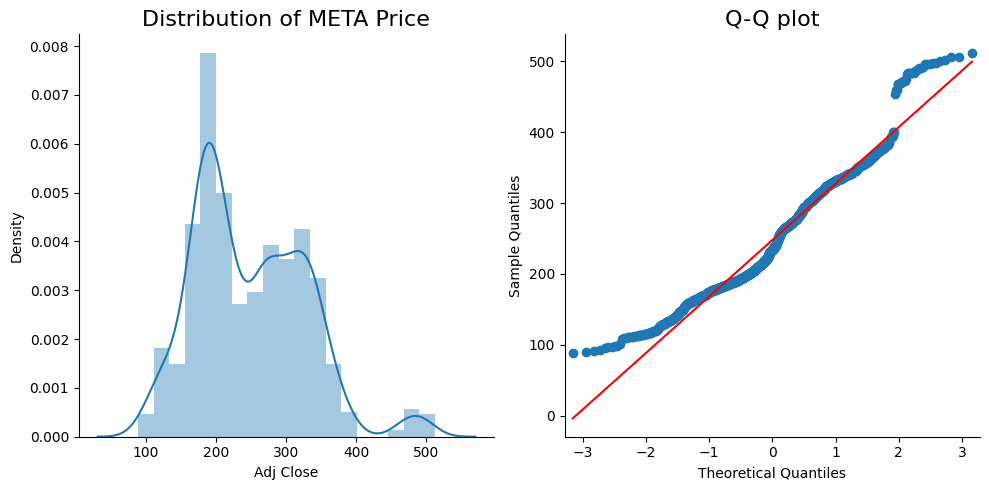

In [10]:
# META Stock price

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# histogram
sns.distplot(main_df['Adj Close'], kde=True,
 norm_hist=True, ax=ax[0])
ax[0].set_title("Distribution of META Price",
 fontsize=16)


# Q-Q plot
qq = sm.qqplot(main_df['Adj Close'].values, line="s", ax=ax[1])
ax[1].set_title("Q-Q plot", fontsize = 16)

sns.despine()
plt.tight_layout()

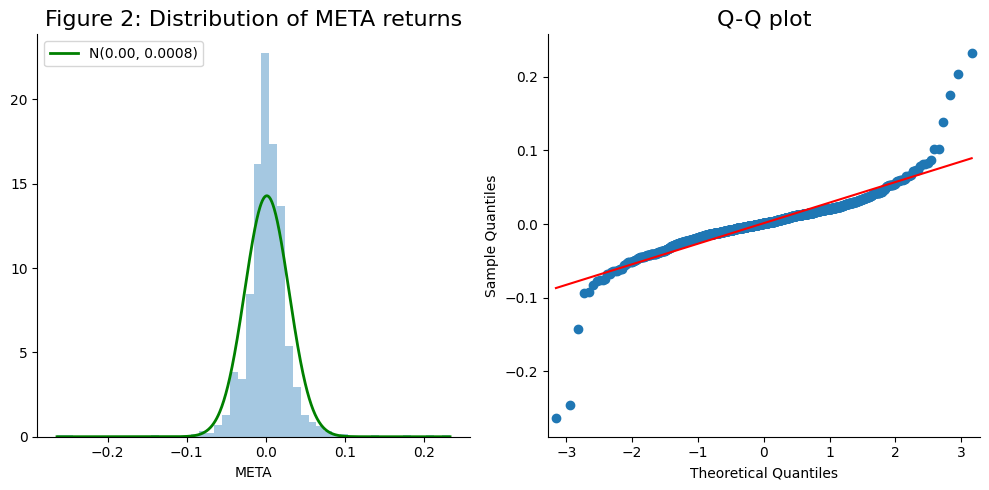

In [11]:
# META stock return

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# histogram
sns.distplot(main_df['META'], kde=False,
 norm_hist=True, ax=ax[0])
ax[0].set_title("Figure 2: Distribution of META returns",
 fontsize=16)
ax[0].plot(pdf, norm_pdf, "g", lw=2,
 label=f"N({mu:.2f}, {sigma**2:.4f})")
ax[0].legend(loc="upper left")


# Q-Q plot
qq = sm.qqplot(main_df['META'].values, line="s", ax=ax[1])
ax[1].set_title("Q-Q plot", fontsize = 16)

sns.despine()
plt.tight_layout()

In [12]:
main_df.columns

Index(['Adj Close', 'META'], dtype='object')

In [13]:
print("---------- Descriptive Statistics ----------")
print("Range of dates:", min(main_df.index.date), "-", max(main_df.index.date))
print("Number of observations:", main_df.shape[0])
print(f"Mean: {main_df['Adj Close'].mean():.4f}")
print(f"Median: {main_df['Adj Close'].median():.4f}")
print(f"Min: {main_df['Adj Close'].min():.4f}")
print(f"Max: {main_df['Adj Close'].max():.4f}")
print(f"Standard Deviation: {main_df['Adj Close'].std():.4f}")
print(f"Skewness: {main_df['Adj Close'].skew():.4f}")
print(f"Kurtosis: {main_df['Adj Close'].kurtosis():.4f}")

---------- Descriptive Statistics ----------
Range of dates: 2019-03-22 - 2024-03-20
Number of observations: 1258
Mean: 247.8708
Median: 233.7070
Min: 88.8158
Max: 512.1900
Standard Deviation: 79.7034
Skewness: 0.6063
Kurtosis: 0.2557


In [14]:
print("---------- Descriptive Statistics ----------")
print("Range of dates:", min(main_df.index.date), "-", max(main_df.index.date))
print("Number of observations:", main_df.shape[0])
print(f"Mean: {main_df.META.mean():.4f}")
print(f"Median: {main_df.META.median():.4f}")
print(f"Min: {main_df.META.min():.4f}")
print(f"Max: {main_df.META.max():.4f}")
print(f"Standard Deviation: {main_df.META.std():.4f}")
print(f"Skewness: {main_df.META.skew():.4f}")
print(f"Kurtosis: {main_df.META.kurtosis():.4f}")


---------- Descriptive Statistics ----------
Range of dates: 2019-03-22 - 2024-03-20
Number of observations: 1258
Mean: 0.0013
Median: 0.0011
Min: -0.2639
Max: 0.2328
Standard Deviation: 0.0279
Skewness: -0.2812
Kurtosis: 19.0142


### Diagram


---

As we can see in the above diagrams, The first figure we can see the plot of stock prices of META as well as stock returns of META.

In the next diagram we can see the histogram of stock return in a Normal distribution for gaussian randomness with it's QQ plot.

At last we can see the Descriptive Statistics of the stock return.

Now we are going to do Diagnosis of the problem in the next section.

### Diagnosis


---

Now let's analyze the diagrams :

To diagnose the issues we are going to do visual inspection and try to understand the randomness behaviour.

In the first diagram as we can see the time series plot of stock prices we can say that it is following a random walk (Random walk suggest that the price changes in an assets are random) (Smith)and in the diagram we can also conclude that the stocks prices are random and unpredictable which shows potential randomness.

Now we look into stock return diagram we can see that it also shows as random pattern of returns over times as some times the retruns are high sometimes they are low, it is moving with an unpredictable movement which show randomness in stock returns.

After that if we see our histogram we can see negative skewness as skewness < 0 is equal to left skewed (Team Member 2: GWP1: Skewness) also it has high kutosis which is also confirmed by our QQ plot which shows heavy tails and from our descriptive statistic results we can confirm where skewness -0.2812 which is negative skewed and kurtosis is 19.0142 the major reason behind this is outlier which makes analysis challenging and also for test reasons we assumes the data distributions to normal but skewness violates these asssumption (Team Member 2: GWP1: Skewness) and it signifies potential randomness in the data.



> Also Visual inspection as first layer of analysis is enough for a start of analysis process but it's not tangible.
The more better approach to test randomness in a times series data is autocorrelation function (ACF) and partial autocorrelation function (PACF) analysis. If there are no significant autocorrelation or partial autocorrelation patterns beyond a few lags, it suggests randomness. we can also do Cross-validation, Residual analysis, Unit root tests etc.

Note : We are goint to understand everything about Autocorrelation in our next topic in which we will further discuss and analyze it, Till then as we have conluded that the stock prices and returns have randomness using visual inspection, Now we will try to undestand the daamage done dure to randomness in the time series data.





### Damage

---

Now we will try to understand what damage will be done to our model if we have don't model randomness properly :

*  The major damage due to failure in modeling time series data is misleading forecasts and as we have previously discussed that uncertanity is the most Prevailing factor while dealing with time series data misleading forecasts can lead to Illusionary risk-assessments whcih will lead to suboptimal decision making and due to all of this mess our castle of glass will be shattered into pieces with financial losses and missed opportunities.

* Ignoring randmoness or not correclty modeling randomness can result in understating or overstating risk asscociated with the assets that we are analyzing which can lead to inefficient resource allocation to a particular assets.

At last I would like to quote one more quote from Nassim Taleb's book (Fooled by Randomness: The Hidden Role of Chance in Life and in the Markets)(Taleb):

> “We favor the visible, the embedded, the personal, the narrated, and the tangible; we scorn the abstract.”

We humans have no control in our emotions we only favour that which we can see, analyze or understand and we always ignore that which doen't have any concrete existence. That's why we need to work with more tangible way of modelling randomness which we will discuss in our next section.

### Directions

---
The direction in which we should move forward to proprly model randomness includes:

> **Direction 1** : Test Autocorrelation function (ACF) and partial autocorrelation function (PACF) to check wether there are any significant autcorrelation after few lags.

> **Direction 2** : Augmented Dickey-Fuller Test (ADF) test to check if stcok price follow random walk that is if the time series data is non-stationary or not.

> **Direction 3** : Stochastic Models such as ARIMA and GARCH to capture and simulate randomness.

> **Direction 4** : Bayesian Methods can be applied to use prior knowlege and update probability distribution i.e posterior knowledge, which can enhance the model from uncertainty and randomness.

## **Autocorrelation** ##

### Definition  
---

Autocorrelation is a statistical concept that measures the degree of similarity between a given time series and its lagged version over successive time intervals.  
The range of autocorrelation is -1 to 1.  
We can calculate autocorrelation using the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF).

### Description
---

Autocorrelation ranges from -1 to +1:  
+1 : Perfect Positive Correlation  
0  : No Correlation  
-1 : Perfect Negative Correlation  

Autocorrelation can help reveal hidden patterns in the data, analyze stationarity and seasonality.    

For calculation of Autocorrelation:  
We can use ACF and PACF.
The ACF measures the linear relationship between an observation at time (t) and the observations at previous times, while the PACF measures the association between (y(t)) and (y(t-k)) while filtering out the linear influence of the random variables that lie in between.  


### Demonstration and Diagram
---


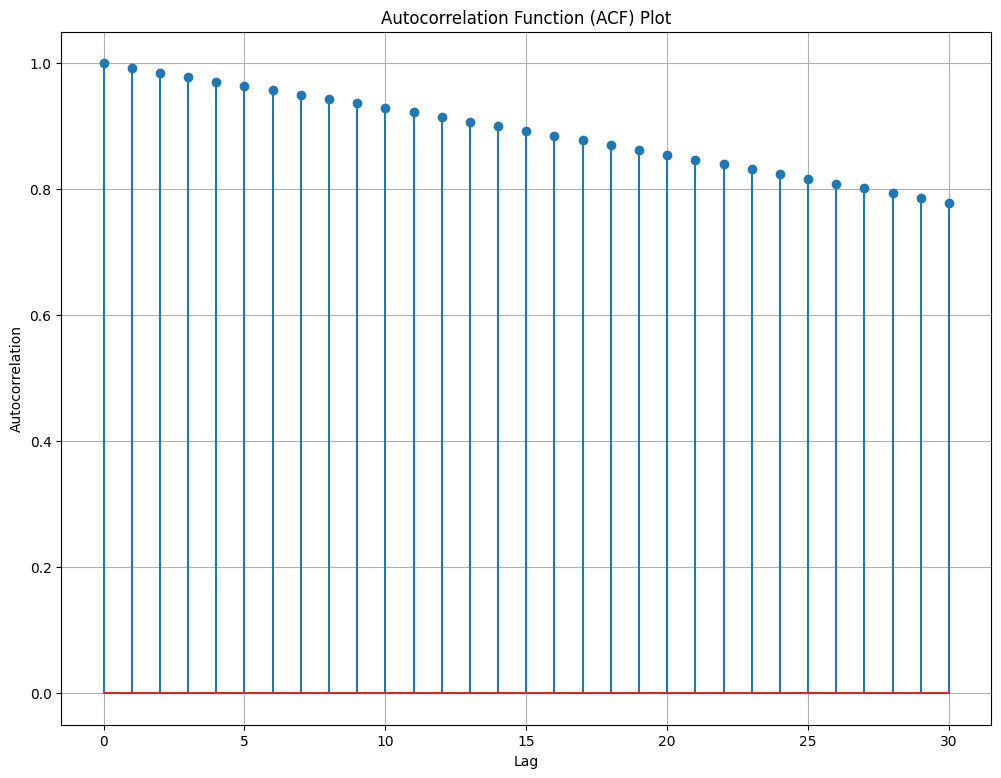

In [15]:
acf = sm.tsa.acf(main_df['Adj Close'].dropna())

plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.grid(True)
plt.show()

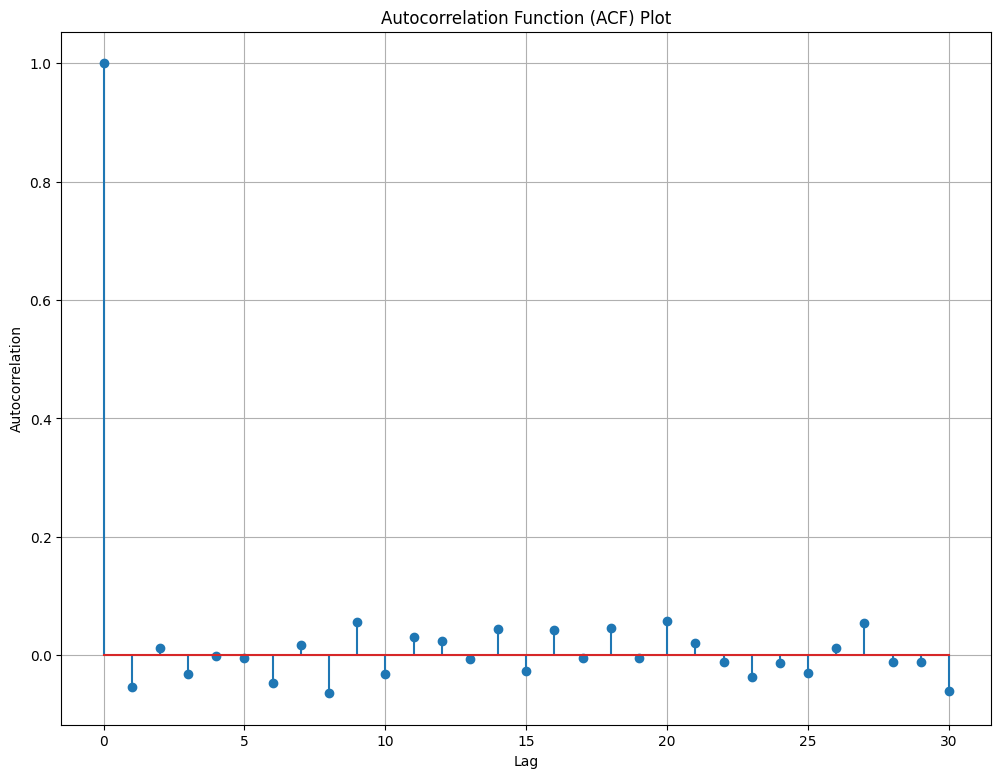

In [16]:
# Returns
acf = sm.tsa.acf(main_df['META'].dropna())

plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.grid(True)
plt.show()

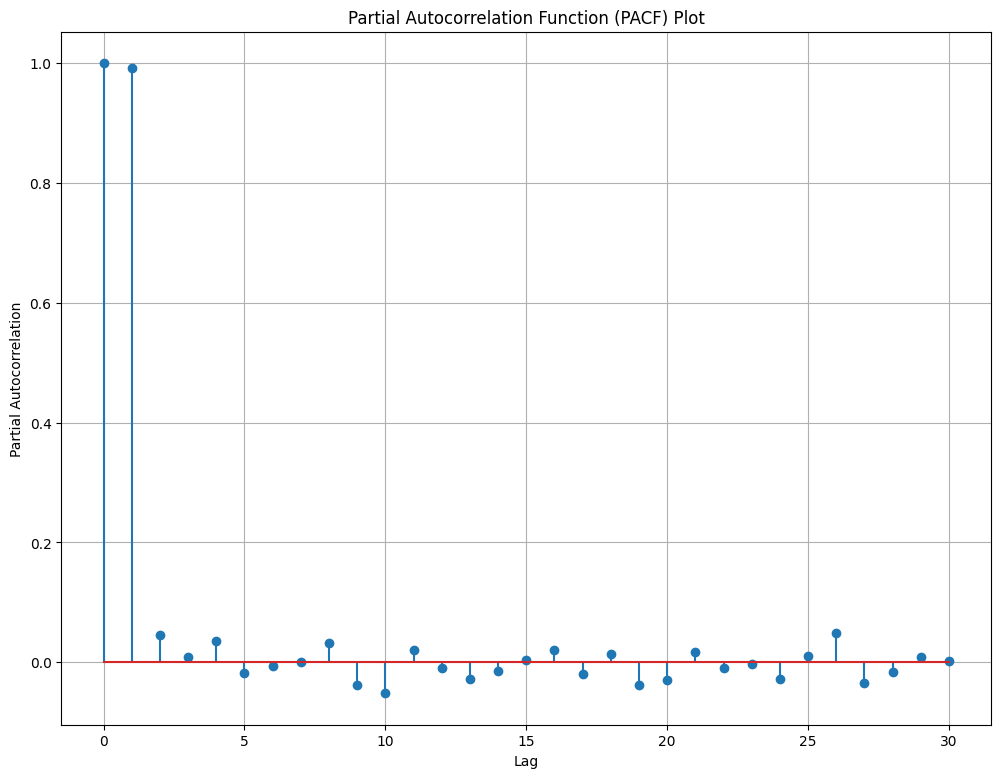

In [17]:
pacf = sm.tsa.pacf(main_df['Adj Close'].dropna())

plt.stem(pacf)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.grid(True)
plt.show()

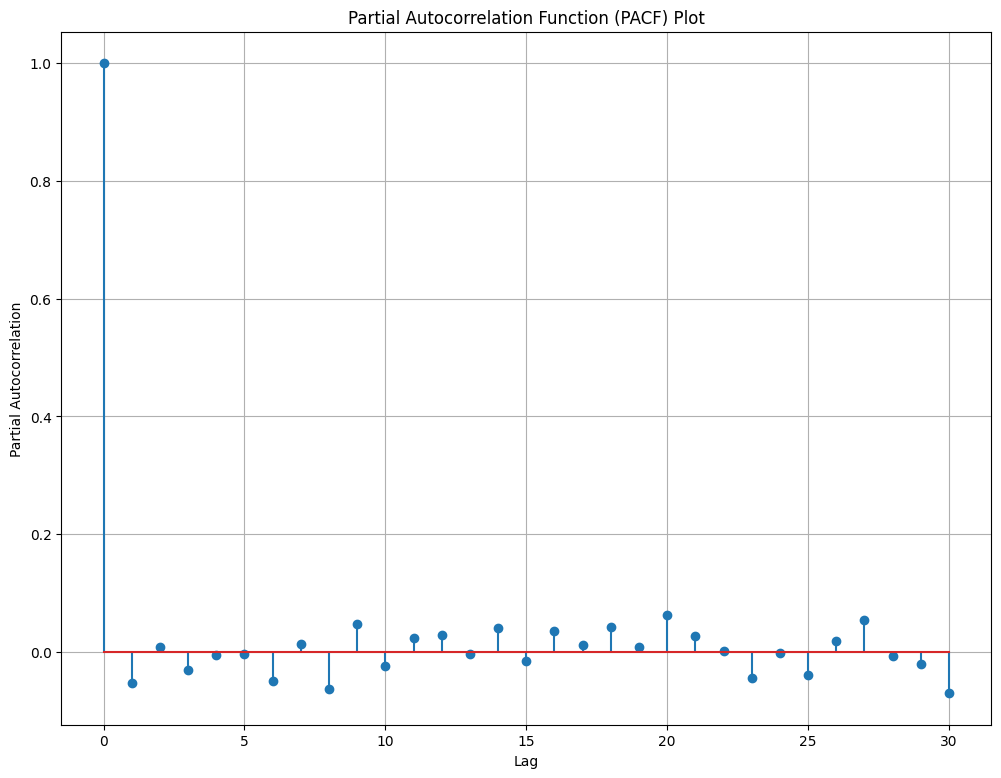

In [18]:
pacf = sm.tsa.pacf(main_df['META'].dropna())

plt.stem(pacf)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.grid(True)
plt.show()

As from the above two plots, we can see that :
1. In ACF Plot, the autocorrelation values gradually decreases, and will become insignifcant after some lags, wil indicates **Tail- off**.
2. In PACF Plot, the autocorrelation value becomes insignificant after first lag, indicating **Cut-off** after one lag.  

Thus, from the above two conditions we can conclude that **autoregressive model - AR(1)**  might be suitable for modeling this time series.

### Diagnosis
---

There are various ways to diagnose the Autocorrelation in the time-series. Here are few of the most used ways:  
1. Visual Inspection of ACF Plot: ACF Plot displays the autocorrelation between the series and its lagged version for different lags.
2. Visual Inspection of PACF Plot: The PACF plot focuses on the unique contribution of a specific lag, excluding the influence of earlier lags.
2. Ljung-Box Test: It is a statistical test to check if there is any overall autocorrelation.  
The Ljung–Box test may be defined as:  
$H_0$: The data are independently distributed  
$H_a$: The data are not independently distributed, they exhibit autocorrelation.

4. Other test commonly used is Durbin-Watson test.  

From the above ways, we have already seen how to analyse the ACF and PACF Plot in the above section. Here is how we can use Ljung-Box Test:

In [19]:
lb_test = sm.stats.acorr_ljungbox(main_df['Adj Close'], lags=[10])
print(lb_test)

         lb_stat  lb_pvalue
10  11678.171192        0.0


A p-value is 0, typically less than 0.05, suggests that the null hypothesis of no autocorrelation can be rejected. Based on these results, there is very strong evidence of autocorrelation.

### Damage
---
Autocorrelation, if not addressed efficiently, can cause following issues in time series analysis:  
1. **Increased Variance of Estimates:** In case of the autocorrelation, the variance of estimates becomes higher.  
2. **Incorrect Parameter Estimates:** Autocorrelation implies relation between the observations, thus, it can lead to biased parameter estimates in the models.   
3. **Impact on Tests of Significance:** Due to the autocorrelation, the results of significance tests become unreliable, due to incorrect parameter estimates.  
4. Due to all of the above reasons, it become difficult for prediction and forecasting based on the model.

### Directions
---
The following models can address the autocorrelation:  

**Direction 1:**  ARIMA Model (Autoregressive Integrated Moving Average): ARIMA Models can capture the autocorrelation in time series data. By appropriately specifying the order of the AR, differencing, and MA terms, ARIMA models can effectively address autocorrelation.  
**Direction 2:** GARCH Model (Generalized Autoregressive Conditional Heteroskedasticity):  GARCH models are used to model the conditional variance of a time series. GARCH can model autocorrelation in the error terms alongside the heteroscedasticity.  
**Direction 3:** Applying robust standard errors: It adjusts the standard errors to address autocorrelation in the residuals.  

For the sake of implementation, have implemented the ARIMA Model in the next step.

## **Heteroskedasticity**

### Definition

--------
One of the basic assumptions of the classical regression model while applying OLS is that the variance of the regression disturbance e is constant for all observations Var(e) = 𝜎2 . The violation of this assumption is called heteroskedasticity (Kmenta). In other terms variance of the residuals is not IID (independent and identically distributed) over a range of measured values.
$$
e \sim N (0, \sigma^{2})
$$

Multiple regression mean function as follows:

$$
E (Y|X) = \beta X
$$

Because the variance function is for multiple regression, Var(𝑒) is actually a covariance matrix. When the error term variances are not constant, the covariance matrix for $n$ observations will be like the following:
 \mathrm{Var}(e) = \begin{pmatrix}
  \delta_{1}^{2} & 0 & 0 & \cdots & 0 \\
  0 & \delta_{2}^{2} & 0 & \cdots & 0 \\
  0 & 0 & \delta_{3} ^{2} & \cdots & 0 \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & 0 & \cdots & \delta_{n} ^{2} \\
\end{pmatrix}
where 𝛿21≠𝛿22≠𝛿23≠⋯≠𝛿2𝑛


### Description

----
Heteroskedasticity is known as heterogeneity of variance. when a variable is assumed to be homoscedastic when it is actually heteroscedastic, it will result in biased estimates of standard errors and overestimating the goodness of fit as measured by the Pearson coefficient.
Heteroskedasticity can be plotted in a scatter plot where it results in an unequal scatter of the residuals, a cone or megaphone shape distribution. The heteroskedasticity is caused by large difference in smallest and largest data points (CFI).



### Demonstration

----
Now we will focus on heteroskedasticity issue.

For this we need to create a time-series model. For time-series Model 1 the 'Adj Close' value of the main-df file are focused.

For time-series Model 2 the 'META' value (Stock Return) of the main-df file are focused.

The Hypothesis for Heteroskedasticity:

𝐻0:Homoscedasticity exists

𝐻1:Heteroskedasticity exists

We run a Breusch-Pagan test to the hypothesis.

#### Model 1: Modeling Stock Price

In [20]:
# Detrend
timeTrend = np.linspace(1, len(main_df['Adj Close']), len(main_df['Adj Close']))
timeTrend = sm.add_constant(timeTrend)

# Fit OLS
model = sm.OLS(main_df['Adj Close'], timeTrend)
fit_g = model.fit()
fit_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     156.6
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           5.95e-34
Time:                        04:52:50   Log-Likelihood:                -7218.5
No. Observations:                1258   AIC:                         1.444e+04
Df Residuals:                    1256   BIC:                         1.445e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.8838      4.242     47.591      0.000     193.561     210.206
x1             0.0731      0.006     12.515      0.000       0.062       0.085
==============================================================================
Omnibus:                        0.221   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.177
Skew:                           0.027   Prob(JB):                        0.915
Kurtosis:                       3.022   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

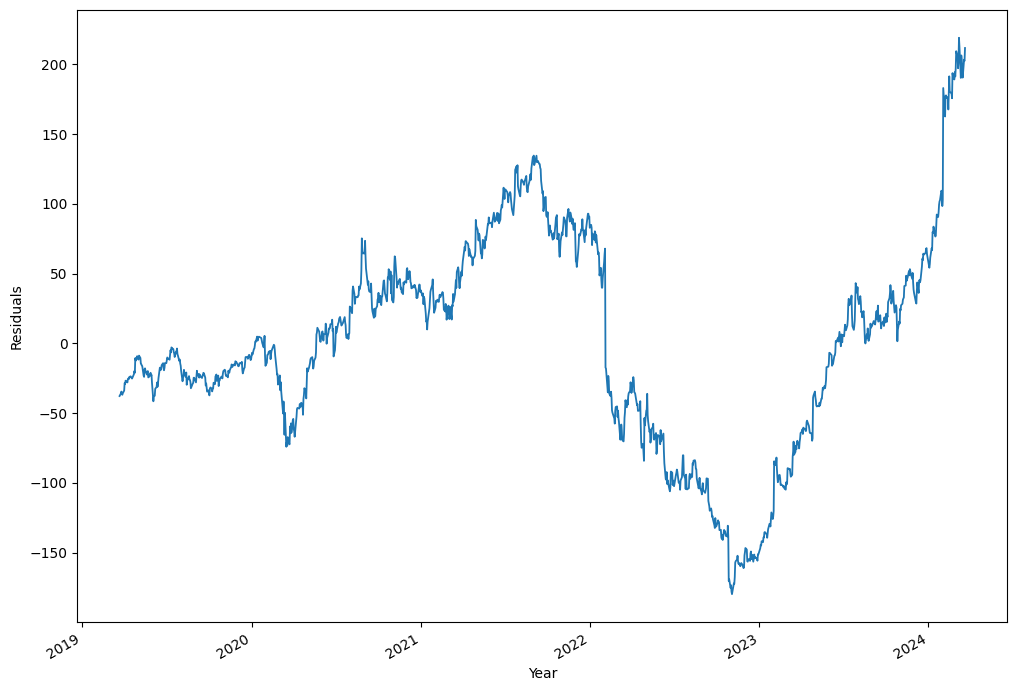

In [21]:
# Figure 3: Residuals from Simple Regression of META Stock Price on Trend
# Plot residuals
goog_res = fit_g.resid
goog_res.plot(linewidth=1.3, xlabel="Year", ylabel="Residuals")
plt.show()

In [22]:
# Heteroskedasticity test
# Breusch-Pagan (BP) test

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
breush_pagan_test = sm.stats.diagnostic.het_breuschpagan(fit_g.resid, fit_g.model.exog)
pd.DataFrame(breush_pagan_test, index=name, columns=[""])

Lagrange multiplier statistic  2.596865e+02
p-value                        2.008427e-58
f-value                        3.267172e+02
f p-value                      4.303885e-65

#### Model 2: Modeling Stock Return

In [23]:
main_df_meta=main_df['META'].dropna()
# Detrend
timeTrend2 = np.linspace(1, len(main_df_meta), len(main_df_meta))
timeTrend2 = sm.add_constant(timeTrend2)

# Fit OLS
model_return = sm.OLS(main_df_meta, timeTrend2)
fit_g_return = model_return.fit()
fit_g_return.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   META   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6984
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.403
Time:                        04:52:50   Log-Likelihood:                 2717.4
No. Observations:                1258   AIC:                            -5431.
Df Residuals:                    1256   BIC:                            -5420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.002      0.089      0.929      -0.003       0.003
x1          1.812e-06   2.17e-06      0.836      0.403   -2.44e-06    6.07e-06
==============================================================================
Omnibus:                      333.809   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18751.407
Skew:                          -0.297   Prob(JB):                         0.00
Kurtosis:                      21.905   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Heteroskedasticity test

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
breush_pagan_test = sm.stats.diagnostic.het_breuschpagan(fit_g_return.resid, fit_g_return.model.exog)
pd.DataFrame(breush_pagan_test, index=name, columns=[""])

Lagrange multiplier statistic  2.930183
p-value                        0.086938
f-value                        2.932354
f p-value                      0.087068

### Diagram
----
For deep analysis we will plot scatter plot for OLS Fitted Value and OLS Residuals to check presence of heteroskedasticity issue

Figure: Scatter Plot for OLS Fitted Values and OLS Residuals

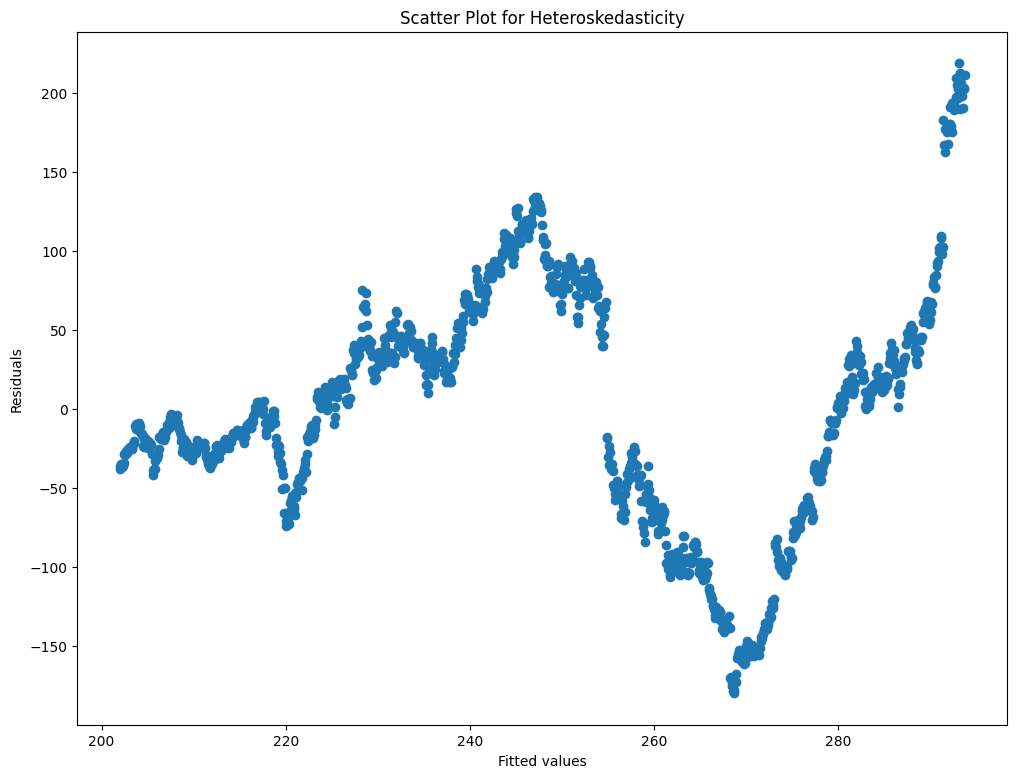

In [25]:
# Scatter plot for heteroskedasticity Stock Price
plt.scatter(fit_g.fittedvalues, fit_g.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Scatter Plot for Heteroskedasticity')
plt.show()

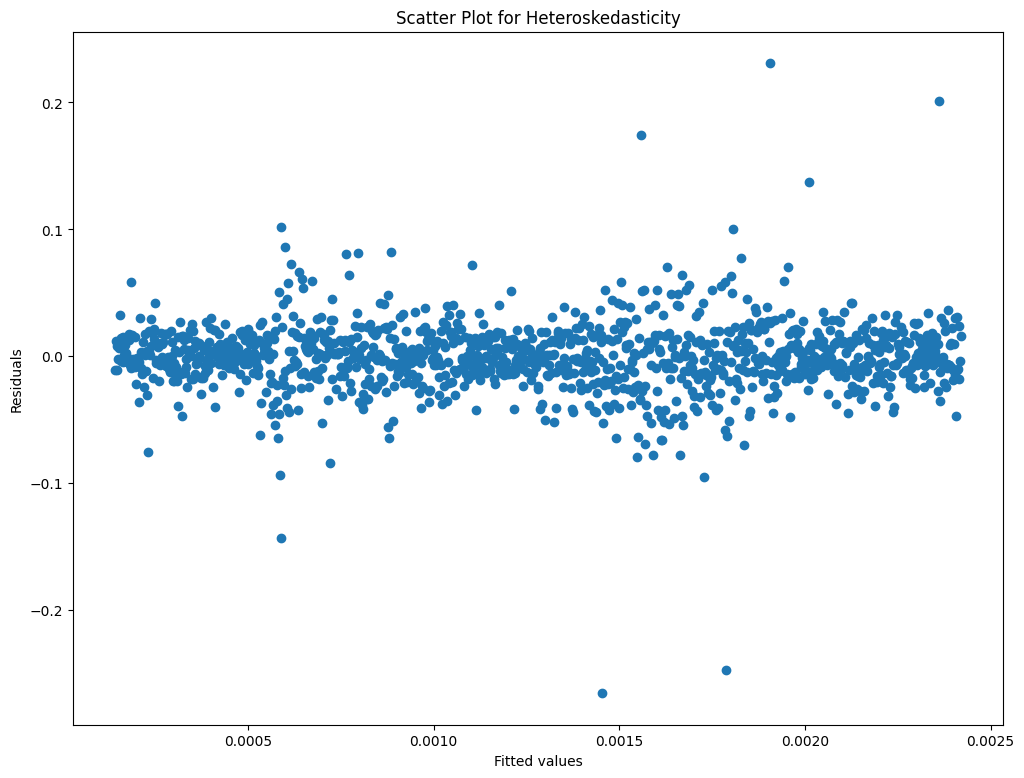

In [26]:
# Scatter plot for heteroskedasticity for Stock Return
plt.scatter(fit_g_return.fittedvalues, fit_g_return.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Scatter Plot for Heteroskedasticity')
plt.show()

### Diagnosis


---

Now let's analyze the Model and Diagrams :

To diagnose the issue of heteroskedescity we will first analyze the OLS model result. The time-series model is built with one lagged time stamp of META stock price and META Return. The condition number is large which indicates that there could be problem of multicollinearity and heteroskedescity.

Further, the Breusch-Pagan (BP) test is a formal statistical test to detect the issue.BP test checks the above hypothesis.This is a Chi-square test.The  𝑝 -value (1.637852e-58) is less than the significant level of 0.05, we reject the null hypothesis. The residuals are not constant, so there is a heteroskedasticity issue in stock price data.
The stock return does not show this issue as P-value (0.086) is more than the significance value(0.05).

In the scatter plot.

Now we look into stock price diagram it shows the increasing distribution from left to right, which means the error term is not constabt in stock price data, presence of heteroskedasticity.

The scatter plot of stock return data is uniform from left to right. The error term is constant, no presence of heteroskedasticity.

**Adding a trend variable in the model**

we can see the residuals from the simple regression model (Model 1)with a trend variable does not appear to exhibit stationarity. The time series of residuals shows what resembles a "V pattern," and therefore, it does not appear that the mean is constant over time. Thus, the residuals from the regression do not form a stationary time series.

Adding a trend variable does not seem to be enough to make META stock price into a stationary time series.

### Damage

---

Lets understand the damage of heteroskedasticity in a time-series model :

The key assumptions of homoscedasticity is vital for OLS regression. OLS estimators are still unbiased, but they are no longer efficient. Inefficient estimators mean that the parameter estimates have higher variances, which reduces the precision of the estimates.

Heteroskedasticity can lead to incorrect inference, including incorrect standard errors, confidence intervals, and hypothesis tests. This can cause incorrect conclusions about the significance of coefficients and the overall goodness-of-fit of the model.

Models that do not account for heteroskedasticity may produce forecasts with underestimated or overestimated uncertainty, leading to inaccurate predictions of future values.

Overall the reliability of the model is at stake.


In [27]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample

In [28]:
# MA(1) for META stock
meta_ma1 = statsmodels.tsa.arima.model.ARIMA(main_df['Adj Close'], order=(0, 0, 1)).fit()
print(meta_ma1.params)

const      247.904316
ma.L1        0.943890
sigma2    1793.600818
dtype: float64


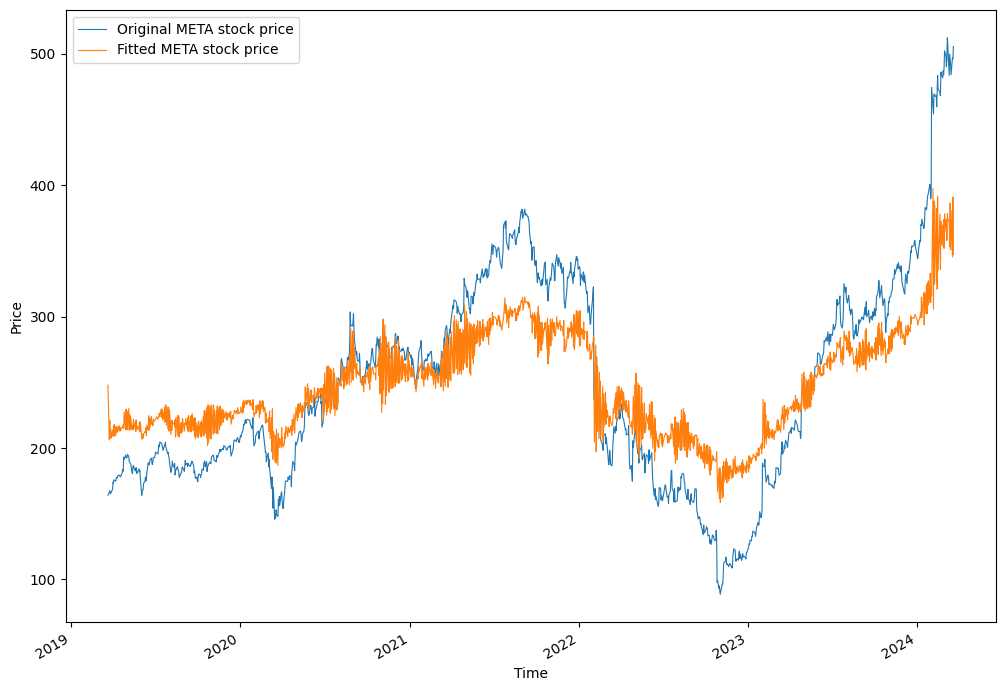

In [29]:
# Plot META vs fitted META stock prices
meta_ma1_res = meta_ma1.resid
meta_ma1_fit = main_df['Adj Close'] - meta_ma1_res

main_df['Adj Close'].plot(linewidth=0.8, label="Original META stock price")
meta_ma1_fit.plot(linewidth=0.8, label="Fitted META stock price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [30]:
# MA(1) for first difference of Google stock price
meta_ma2 = statsmodels.tsa.arima.model.ARIMA(main_df['Adj Close'], order=(0, 1, 1)).fit()
print(meta_ma2.params)

ma.L1     -0.062500
sigma2    44.204954
dtype: float64


We can see now we only have estimated  𝜃
  = -0.062561 but no intercept. It is because we are modeling the first difference. Let's check the actual vs. predicted graph.

Figure: META Stock Price vs. Fitted META Stock Price Using First Differencing

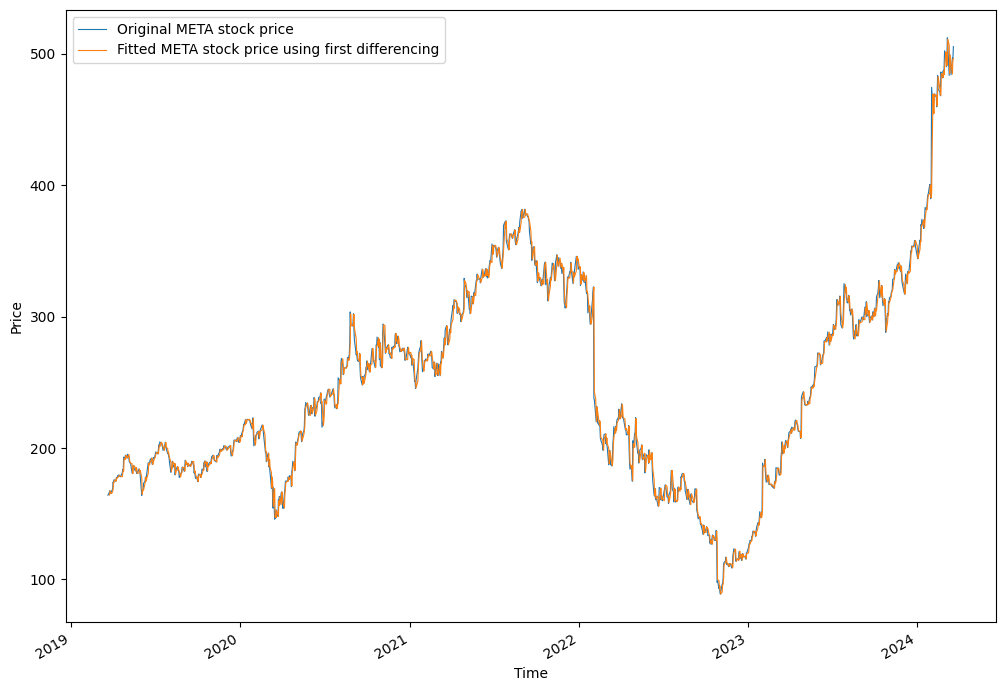

In [31]:
# Plotting Google vs fitted Google stock prices using first differencing
meta_ma2_res = meta_ma2.resid
meta_ma2_fit = main_df['Adj Close'] - meta_ma2_res

meta_ma2_res = meta_ma2_res[
    1:
]  # need to skip first element since the model lost one data point
meta_ma2_fit = meta_ma2_fit[
    1:
]  # need to skip first element since the model lost one data point

main_df['Adj Close'].plot(linewidth=0.8, label="Original META stock price")
meta_ma2_fit.plot(
    linewidth=0.8, label="Fitted META stock price using first differencing"
)
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

### Directions

---
The direction in which we should move forward to proprly model heteroskedasticity includes:

> **Direction 1** : Visual Inspection: Begin by visually inspecting the time series plot of the residuals obtained from model. Look for patterns or trends in the variance of the residuals over time. Heteroskedasticity often manifests as increasing or decreasing variance over time. Use residual plot, Scatter Plot forvisual inspection.

> **Direction 2** : Perform Breusch-Pagan test, White test diagnostic tests for heteroskedasticity.

> **Direction 3** :Remove Trend from Non-Stationary Time Series by using trend variable removal, differencing method, white noise removing etc.

> **Direction 4** : Use MA, ARIMA, GARCH methods for dtatistically modeling time-series data.

As we can see above by using MA(1) an efficient model has been generated.

## **Non-Stationary**

###Definition

---

To understand Non-stationary let's first define stationary, A time series is considered as stationary if has no trends and it does not exhibits constant varaince over time also it has constant autocorrelation structure over time.

Now let's understand non-stationary
A time series $X_t$ is to be non-stationary if its statistical properties such as mean $μ_t$, variance $σ^2_t$, and autocorrelation structure over time, which violates the assumption of stationarity (Iordanova).

A time series is non-stationey if:

* $μ_t$ is a function of t, i.e $μ_t$ is not equal to $μ$ for all t.
* $σ^2_t$ function of t, i.e  $σ^2_t$ is not equal to $σ^2$ for all t.
* non-constant Autocorrelation structure for all t.

###Description

---

Non-stationey in time series lead to challanges in modelling, forecasting, and statistical analysis, because in non-stationary data changes over time. non-stationary requires special handling and techniques to make the data stationary for accurate modeling and analysis.

###Demonstration

---
Before special handling of non-stationary we need to identify if the data is non-stationary or not after.

one of the way to find if the data is non-stationary or not is to perform an augumented dickey-fuller test, which uses null and alternatice hypothesis, let's first understand that:

* $H_0$: The time-series is non-stationary means it has some time dependent structure and is not constant over time.

* $H_A$: The time-series is stationary.

In the test, if the P-value is less than the some threshold i.e ($α = .05$), we can then reject the null hypothesis and conclude that the time series is stationary(Zach).

Now we will test the stock price and stock return of META to test if these time series data are non stationary or not :

In [32]:
# function to check stationarity of the time-series data

def check_for_stationary(X, threshold=0.05):

  pvalue = adfuller(X)[1]
  if pvalue < threshold:
    print(' p-value= ' + str(pvalue) + ' The series ' + X.name + ' is likely stationary.')
    return True
  else:
    print(' p-value= ' + str(pvalue) + ' The series ' + X.name + ' is likely non-stationary.')
    return False

In [33]:
X = check_for_stationary(main_df['Adj Close']);


 p-value= 0.976808755655692 The series Adj Close is likely non-stationary.


In [34]:
X = check_for_stationary(main_df['META']);

 p-value= 0.0 The series META is likely stationary.


### Diagram

---

we will use the same diagram to that we plotted for the visual inspection of randomness (Team Member 1 : Modeling Randomness GWP2)



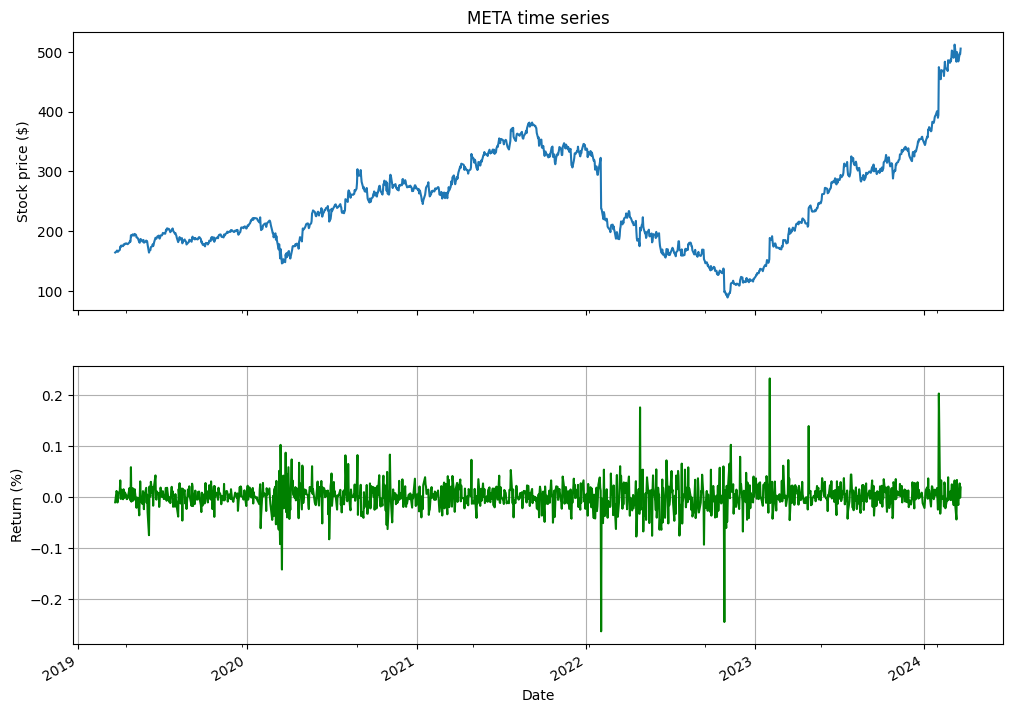

In [35]:
fig, ax = plt.subplots(2, 1, sharex=True)
main_df["Adj Close"].plot(ax=ax[0])
ax[0].set(title="META time series",
 ylabel="Stock price ($)")
plt.grid(True)

main_df["META"].plot(ax=ax[1], color='green')
ax[1].set(ylabel="Return (%)")
plt.grid(True)
plt.show()

###Diagnosis

---
Let's analyze the results:

 In the above image we can see time series plot and the first plot is META price plor and second plot is META return plot, and through visual inspection we can see that the META price plot does not have constnt mean and variance over time which makes the price plot non-stationary on the other have the stock return have constant mean and variance over time, appearing as a horizontal line or band around a constant value.

 In modeling randomness the histogram plot by (Team member 1: Modeling randomness GWP2) shows that the stock prices are random and does not exhibits constant mean and variance over time while the returns have constant mean and varaince over time.

 one more inspection that we have done is ACF plots by (Team member 2: Autocorrelation GWP2) in which we can see the stock price ACF & PACF plot the autcorrelation values is not rapidaly decaying to zero which indicated  significance correlation which mean the data is non-stationary while on the other hand we can see for stock retrun ACF and PACF plot the autocorrelation values are decaying rapidaly to zero making it stationary.

 But these are just visual analysis we need something more tangible statistical test because sometime we cannont comprehend everything through visual inspection.
So we have some ADF(Augumented Dickey fuller) test and p-value that we got for stock price is p-value= 0.976808755655692 which doesn't reject the null hypothesis which makes it non-stationary on the other hand the p-value for stock return is p-value = 0.0 which makes the returns stationary.

Note: The stationarity of a stock return depends on the specific stock which is being analyzed and the time period that is being considered, generally stock returns exhibits staionary behvaiour but it may exhibit non-stationary behavior over longer time horizons.



###Damage

---
There are several damaging effects on the analysis and interpretation of non-stationary data:

* Inaccurate model predictions: Building accurate models using non-stationary data is very challenging as the data changes over time and the models assumes stationarity in the data while modeling which results in failure to observe the underlying patterns and trends.

* Baised Estimates: estimates values from non-stationary data may not provide true relationship between variables which can lead to biased results.

* Unreliable forecasts: The changing nature of non-stationary data when forecasted can be unrelaibale and misleading as it is very difficult to predict the future values of changing data..

* False correlations: Non-stationary data can create flase correlations between variables that are not really related whcih can mislead and lead to false conclusion.

To counter these issues we are going to discuss some direction:


###Directions

---

> **Direction 1**: Differencing: we can apply differencing  and make the data stationary by taking first difference or seasonal difference (Iordanova).

> **Direction 2**: Trend modeling: trend modeling methods can be used to capture and model the changing mean or trend in the data.

> **Direction 3**: Detrending: As done by (Team memeber 3: Heteroskedasticity GWP2), it removes the trend component from the data and makes the data stationary (Iordanova).

> **Direction 4**: Seasonal adjustment: some data have seasonal components so we can adjust the data according tho that using seasonal decomposition methods.



## **References**

* Smith, Tim. “Random Walk Theory: Definition, How It's Used, and Example.” Investopedia, 23 Feb 2023, https://www.investopedia.com/terms/r/randomwalktheory.asp. Accessed 25 March 2024.

* Taleb, Nassim Nicholas. “Fooled by Randomness Quotes by Nassim Nicholas Taleb.” Goodreads, https://www.goodreads.com/work/quotes/3119175-fooled-by-randomness-the-hidden-role-of-chance-in-life-and-in-the-marke. Accessed 25 March 2024.

* Team Member 1. “GWP2: Modeling Randomness.” Modeling randomness.

* Team member 2. “GWP1: Skewness.” Skewness. Skewness.

* Team member 2. “GWP2: Autocorrelation.” Autocorrelation.

* Team member 3. “GWP2: Heteroskedasticity.” Heteroskedasticity. Heteroskedasticity.

* Zach. “Augmented Dickey-Fuller Test in Python (With Example).” Statology, 25 May 2021, https://www.statology.org/dickey-fuller-test-python/. Accessed 25 March 2024.


* Iordanova, Tzveta. “Introduction to Non-Stationary Processes.” Investopedia, https://www.investopedia.com/articles/trading/07/stationary.asp. Accessed 25 March 2024.

* J. Kmenta. “Heteroskedasticity.” Palgrave Macmillan UK EBooks, 1 Jan. 2018, pp.
5796–5797, https://doi.org/10.1057/978-1-349-95189-5_1162. Accessed 15 Mar. 2024.

* CFI. “Heteroskedasticity.” Corporate Finance Institute, 2022,
corporatefinanceinstitute.com/resources/data-science/heteroskedasticity/. Accessed 24 Mar. 2024.

* Autocorrelation
https://www.investopedia.com/terms/a/autocorrelation.asp  

* https://spureconomics.com/autocorrelation-causes-and-consequences/  
* https://datamagazine.co.uk/understanding-and-addressing-autocorrelation-in-regression/